In [1]:
# importing the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
# import the data file
dataset=pd.read_csv('snsdata.csv')
dataset.head(3)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
# Missing Value-Status
feature_with_na=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1]

for feature in feature_with_na:
    print(feature,np.round(dataset[feature].isnull().mean(),4),'in percent')
print('Missing values in total (number):',dataset.isnull().sum().sum())

gender 0.0908 in percent
age 0.1695 in percent
Missing values in total (number): 7810


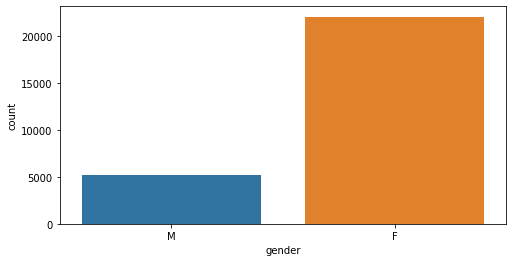

In [4]:
# Gender plot (dropna)
plt.figure(figsize=(8,4))
sns.countplot(data = dataset, x = "gender")
plt.show()

In [5]:
# Gender-Status
dataset.gender.value_counts(dropna=False)

F      22054
M       5222
NaN     2724
Name: gender, dtype: int64

In [6]:
# check the unique values 
print(dataset['gender'].unique())
# check the null values in the dataset
print(dataset.gender.isnull().values.sum())

['M' 'F' nan]
2724


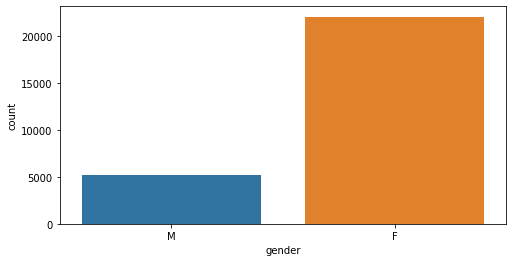

In [7]:
#  ploting the gendee variables 
plt.figure(figsize=(8,4))
sns.countplot(data = dataset, x = "gender")
plt.show()

In [8]:
# age variables Status 
dataset.age.value_counts(dropna=False).head(5)

NaN       5086
17.443      36
16.438      32
17.626      31
17.399      31
Name: age, dtype: int64

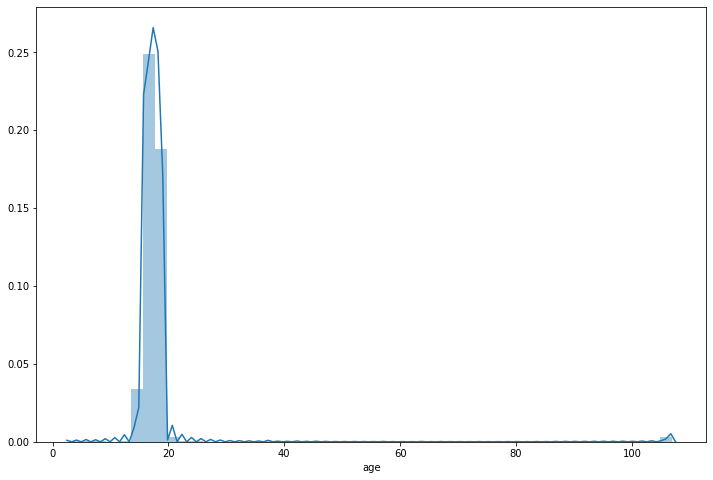

In [9]:
# plot the age variable to visualize the dataset distribution 
plt.figure(figsize=(12,8))
sns.distplot(dataset["age"])

plt.show()

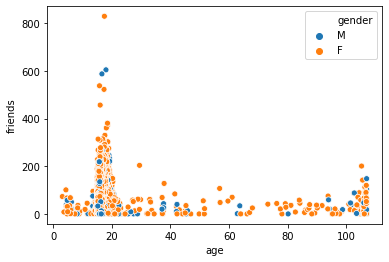

In [10]:
# plot Age v/s friends vs gender
sns.scatterplot('age', 'friends', hue='gender', data=dataset)

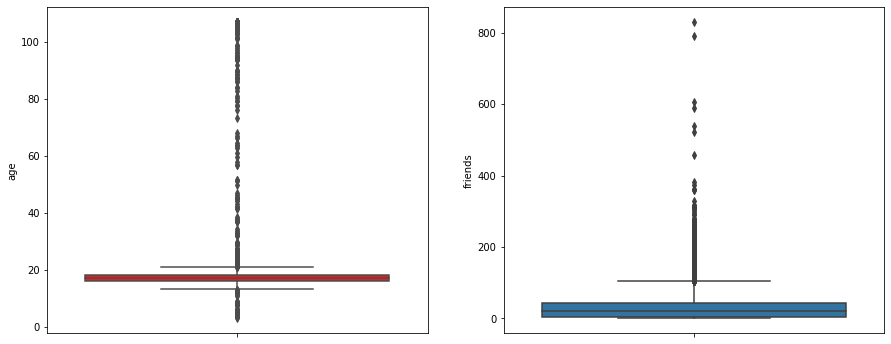

In [11]:
# outlier dedication -Age & friends
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=dataset["age"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=dataset["friends"])
plt.show()

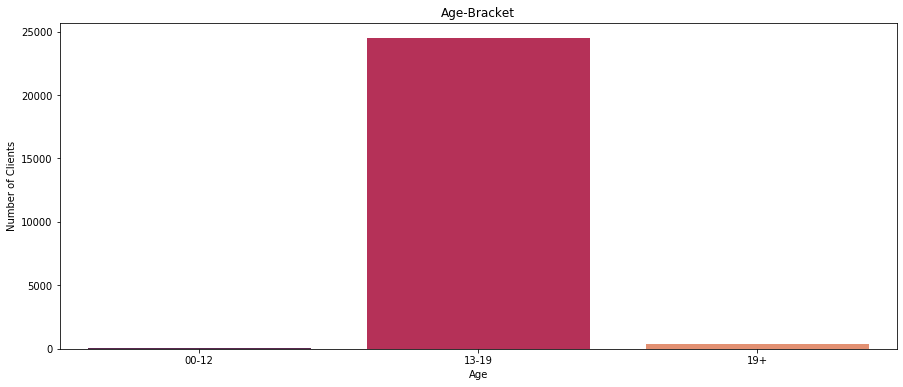

In [12]:
# Ploting of the age brackets


df=dataset.copy()

age00_12 = df.age[(df.age <= 12) & (df.age >= 0)]
age13_19 = df.age[(df.age < 20) & (df.age >= 13)]
age19above = df.age[df.age >= 20]

x = ["00-12","13-19","19+"]
y = [len(age00_12.values),len(age13_19.values),len(age19above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Age-Bracket")
plt.xlabel("Age")
plt.ylabel("Number of Clients")
plt.show()

In [13]:
# count in total of the age brackets
print('Age(00_12):',len(age00_12.values)),print('Age(13_19):',len(age13_19.values)),print('Age(19+):',len(age19above.values))

Age(00_12): 48
Age(13_19): 24477
Age(19+): 384


(None, None, None)

In [14]:
# create the copy of the dataset 
data=dataset.copy()

In [15]:
# New_dataset with the traget client age(teenage)
# Noted the data lose 
new_data=data[(data.age>=13) & (data.age<20)]
new_data.shape

(24477, 40)

In [16]:
# check the dataset stats 
new_data.describe()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,24477.000000,24477.000000,24477.000000,24477.000000,24477.000000,24477.000000,24477.000000,24477.000000,24477.000000,24477.000000,...,24477.000000,24477.000000,24477.000000,24477.000000,24477.000000,24477.000000,24477.000000,24477.000000,24477.000000,24477.000000
mean,2007.484005,17.252429,30.948033,0.275238,0.265269,0.228255,0.167382,0.146137,0.136414,0.109899,...,0.104016,0.269600,0.364465,0.152633,0.070842,0.053111,0.187972,0.117498,0.091637,0.063039
std,1.114813,1.157465,36.511936,0.813574,0.717620,0.928251,0.744518,0.653547,0.522164,0.522041,...,2.138328,0.715833,0.733639,0.479340,0.351680,0.285637,0.642255,0.436903,0.408755,0.357245
min,2006.000000,13.027000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,16.304000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,17.265000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.000000,18.220000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,19.995000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,...,327.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


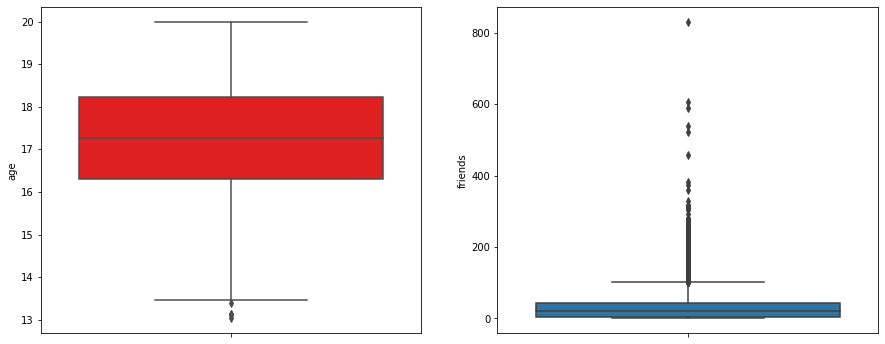

In [17]:
# outlier dedication -Age & friends
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=new_data["age"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=new_data["friends"])
plt.show()

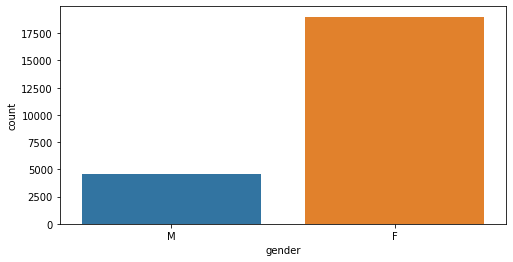

F      19015
M       4587
NaN      875
Name: gender, dtype: int64

In [18]:
# Gender plot (dropna)
plt.figure(figsize=(8,4))
sns.countplot(data = new_data, x = "gender")
plt.show()


# Check the Gender status in the new-dataset
new_data.gender.value_counts(dropna=False)

In [19]:
# recheck the gender variable unique values 
print(new_data['gender'].unique())

['M' 'F' nan]


In [20]:
# check the null values in the gender- cateogrical variables 
print(new_data.gender.isnull().values.sum())

875


In [21]:
# imputation of the null values with the node of the gender variables 
new_data['gender']=new_data['gender'].fillna(new_data['gender'].mode()[0])

C:\Users\ashish\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
# recheck the unique values of the gender feature 
new_data['gender'].unique()

array(['M', 'F'], dtype=object)

In [23]:
# Year wise mean value of-age feature 
new_data.groupby('gradyear').age.mean()

gradyear
2006    18.655858
2007    17.706172
2008    16.767701
2009    15.819573
Name: age, dtype: float64

In [24]:
new_data.head(2)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [25]:
# labeling of the gender- Cateogrical feature (1- female & 2- male)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
new_data['gender']=labelencoder.fit_transform(new_data['gender'])

C:\Users\ashish\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [26]:
# creating the copy of the new_data
final_data=new_data.copy()

In [27]:
# final_data-into- Array
X=final_data.values

In [28]:
X

array([[2.0060e+03, 1.0000e+00, 1.8982e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0060e+03, 0.0000e+00, 1.8801e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0060e+03, 1.0000e+00, 1.8335e+01, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [2.0090e+03, 1.0000e+00, 1.5784e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0090e+03, 1.0000e+00, 1.6378e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0090e+03, 0.0000e+00, 1.8724e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [29]:
# Scaling the feature 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x1_std=scaler.fit_transform(X)

In [44]:
df_std=pd.DataFrame(x1_std,columns=dataset.columns)
df_std.head(2)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0.0,1.0,0.854621,0.008434,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.828645,0.000000,0.0,0.066667,0.0,0.0,0.0,0.0,...,0.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(x1_std)
    wcss.append(kmeans.inertia_)

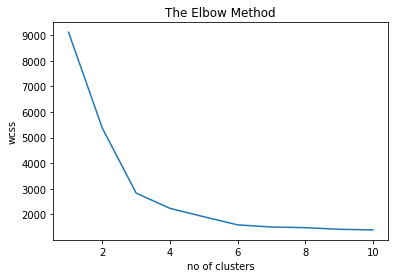

In [32]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [33]:
#Building the Model
km = KMeans(n_clusters = 5)
y_predicted = km.fit_predict(x1_std)
y_predicted

array([3, 1, 3, ..., 2, 2, 0])

In [45]:
#df_std=pd.DataFrame(x1_std,columns=final_data.columns)
df_std['cluster'] = y_predicted
df_std.tail()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
24472,1.0,1.0,0.443169,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
24473,1.0,1.0,0.396814,0.001205,0.000000,0.066667,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
24474,1.0,1.0,0.395666,0.000000,0.000000,0.066667,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
24475,1.0,1.0,0.480913,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
24476,1.0,0.0,0.817595,0.003614,0.083333,0.000000,0.0,0.058824,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [46]:
# develop the dataframe with the cluster 
teenage_cluster_1= df_std[['gradyear','gender', 'age','friends','cluster']]
teenage_cluster_1.head()

,gradyear,gender,age,friends,cluster
0,0.0,1.0,0.854621,0.008434,3
1,0.0,0.0,0.828645,0.000000,1
2,0.0,1.0,0.761768,0.083133,3
3,0.0,0.0,0.839265,0.000000,1
4,0.0,0.0,0.856487,0.012048,1


In [38]:
# Check- Cluster age mean 
age_cluster= df_std.groupby('cluster').age.mean()
age_cluster

cluster
0    15.791828
1    18.158179
2    16.403687
3    18.295600
4    16.744948
Name: age, dtype: float64

In [39]:
# Check- Cluster's gender count 
gender_cluster=new_data.groupby('cluster').gender.count()
gender_cluster

cluster
0    4976
1    9826
2    2027
3    2560
4    5088
Name: gender, dtype: int64

In [40]:
# Check- Gender's count 
new_data.groupby('gender').cluster.count()

gender
0    19890
1     4587
Name: cluster, dtype: int64

In [41]:
# Check- Cluster's friends mean 
friends_cluster=new_data.groupby('cluster').friends.mean()
friends_cluster

cluster
0    35.445137
1    30.349277
2    24.491367
3    25.605859
4    32.966392
Name: friends, dtype: float64

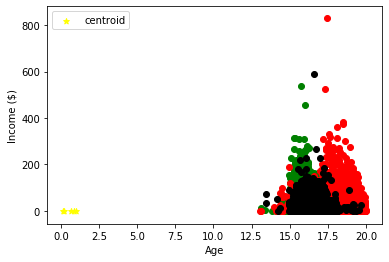

In [42]:
df=teenage_cluster_1.copy()
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.age,df1['friends'],color='green', )
plt.scatter(df2.age,df2['friends'],color='red')
plt.scatter(df3.age,df3['friends'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='yellow',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()